In [17]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np
import os
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



In [20]:
data_dir = pathlib.Path("/content/drive/MyDrive/Dataset_full/ds_train")
print(data_dir)
data_teste = pathlib.Path("/content/drive/MyDrive/Dataset_full/ds_test")
print(data_teste)

/content/drive/MyDrive/Dataset_full/ds_train
/content/drive/MyDrive/Dataset_full/ds_test


In [21]:
np.random.seed(1000)

image_shape = 227
batch_size = 100
AlexNet = Sequential()

# Primeira camada convolucional
AlexNet.add(Conv2D(filters=96, input_shape=(image_shape, image_shape, 3), kernel_size=(11, 11), strides=(4, 4), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Segunda camada convolucional
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Terceira camada convolucional
AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))

# Quarta camada convolucional
AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))

# Quinta camada convolucional
AlexNet.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Camadas densas
AlexNet.add(Flatten())
AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))

AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))

AlexNet.add(Dense(1000))
AlexNet.add(Activation('relu'))

# Camada de saída
AlexNet.add(Dense(5))
AlexNet.add(Activation('softmax'))

# Resumo do modelo
AlexNet.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 57, 57, 96)        34944     
                                                                 
 activation_9 (Activation)   (None, 57, 57, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 29, 29, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 256)       614656    
                                                                 
 activation_10 (Activation)  (None, 29, 29, 256)       0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 256)       0         
 g2D)                                                 

In [22]:
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [23]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    label_mode="categorical",
    image_size=(image_shape, image_shape),
    batch_size=batch_size
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(image_shape,image_shape),
    batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_teste,
    seed=123,
    label_mode="categorical",
    image_size=(image_shape,image_shape),
    batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 43028 files belonging to 5 classes.
Using 38726 files for training.
Found 43028 files belonging to 5 classes.
Using 4302 files for validation.
Found 4779 files belonging to 5 classes.
['basal_cell_carcinoma', 'melanoma', 'nevus', 'seborrheic_keratosis', 'squamous_cell_carcinoma']


In [24]:
for image_batch, labels_batch in train_ds:
  train_img = image_batch
  train_labels = labels_batch
  break
for image_batch, labels_batch in val_ds:
  val_img = image_batch
  val_labels = labels_batch
  break
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  test_img = image_batch
  test_labels = labels_batch
  break

(100, 227, 227, 3)


In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [26]:
epochs = 50



history = AlexNet.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
    )

Epoch 1/50
388/388 [==============================] - 225s 92ms/step - loss: 14.1687 - accuracy: 0.6793 - val_loss: 0.9546 - val_accuracy: 0.6781
Epoch 2/50
388/388 [==============================] - 15s 38ms/step - loss: 0.9287 - accuracy: 0.6831 - val_loss: 0.9388 - val_accuracy: 0.6808
Epoch 3/50
388/388 [==============================] - 15s 38ms/step - loss: 0.9079 - accuracy: 0.6858 - val_loss: 0.8931 - val_accuracy: 0.6876
Epoch 4/50
388/388 [==============================] - 15s 38ms/step - loss: 0.8833 - accuracy: 0.6909 - val_loss: 0.8332 - val_accuracy: 0.7176
Epoch 5/50
388/388 [==============================] - 15s 38ms/step - loss: 0.7934 - accuracy: 0.7171 - val_loss: 0.7752 - val_accuracy: 0.7178
Epoch 6/50
388/388 [==============================] - 15s 38ms/step - loss: 0.7240 - accuracy: 0.7369 - val_loss: 0.7141 - val_accuracy: 0.7378
Epoch 7/50
388/388 [==============================] - 15s 38ms/step - loss: 0.6818 - accuracy: 0.7500 - val_loss: 0.7210 - val_accurac

In [27]:
loss, acc = AlexNet.evaluate(test_ds)
print("Accuracy", acc)

48/48 [==============================] - 30s 523ms/step - loss: 2.2227 - accuracy: 0.7717
Accuracy 0.7717095613479614


In [28]:
# prompt: print the classification report
import numpy as np
from sklearn.metrics import classification_report


# Get predictions for the test set
y_pred = AlexNet.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true = tf.concat([y for x, y in test_ds], axis=0).numpy()
# Convert y_true to class indices
y_true_classes = np.argmax(y_true, axis=1)

# Print the classification report
print(classification_report(y_true_classes, y_pred_classes))


48/48 [==============================] - 1s 21ms/step
              precision    recall  f1-score   support

           0       0.52      0.44      0.48       477
           1       0.69      0.37      0.48       722
           2       0.83      0.98      0.90      3260
           3       0.20      0.05      0.08       190
           4       0.14      0.09      0.11       130

    accuracy                           0.77      4779
   macro avg       0.48      0.39      0.41      4779
weighted avg       0.73      0.77      0.74      4779



In [29]:
y_pred=np.argmax(AlexNet.predict(test_img), axis=-1)

# Convert test_labels to class indices
test_labels = np.argmax(test_labels, axis=1)

con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()



4/4 [==============================] - 1s 60ms/step


48/48 [==============================] - 1s 20ms/step


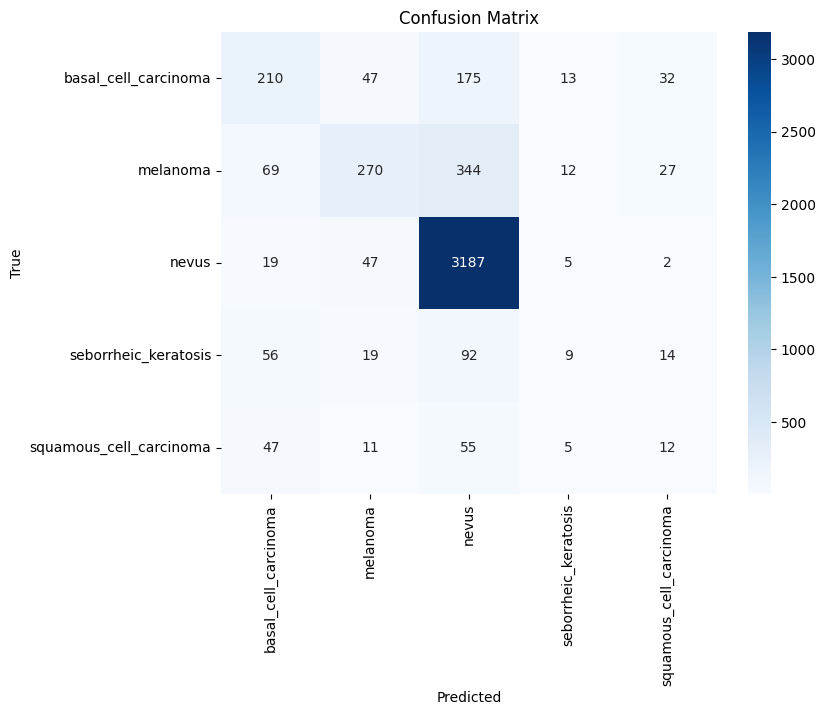

In [30]:
# prompt: imprima a matriz confusao do modelo acima

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for the test set
y_pred = AlexNet.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the test set
y_true = tf.concat([y for x, y in test_ds], axis=0).numpy()
y_true_classes = np.argmax(y_true, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

48/48 [==============================] - 1s 21ms/step


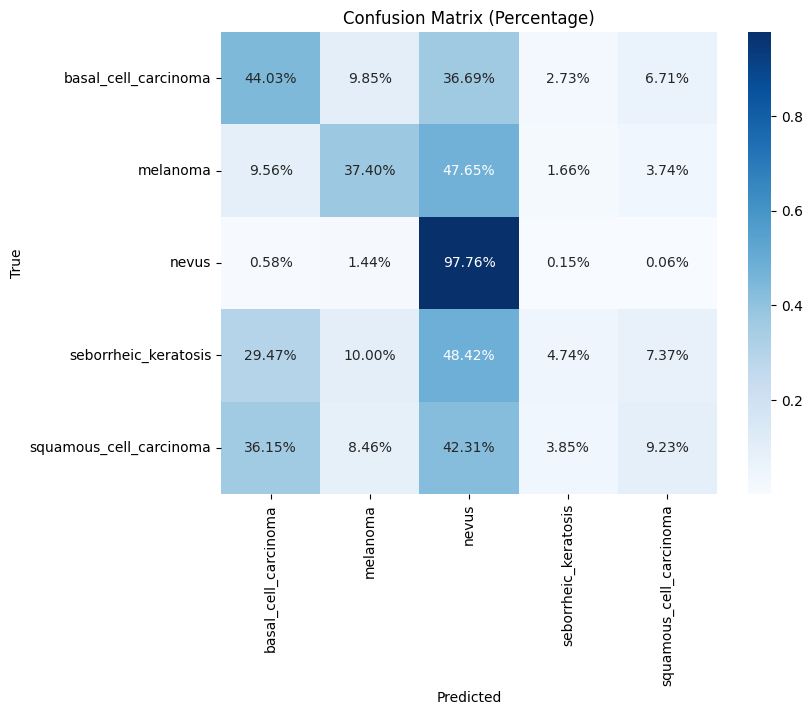

In [33]:
# prompt: gere uma matriz de confusão do treinamento acima mas com porcentagem

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for the test set
y_pred = AlexNet.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the test set
y_true = tf.concat([y for x, y in test_ds], axis=0).numpy()
y_true_classes = np.argmax(y_true, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Normalize the confusion matrix to get percentages
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix using seaborn with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt=".2%", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentage)')
plt.show()
